In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyiron import Project

In [3]:
data_pr = Project("import_database")

In [4]:
data_pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,21,finished,None,df1_A1_A2_A3_EV_elast_phon,/df1_A1_A2_A3_EV_elast_phon,/home/yury/pyiron/projects/,pyiron-2021/import_database/Cu_database/,2021-02-08 10:33:52.341472,None,None,zora@cmti001#1,GenericJob,0.4,None,None
1,22,finished,None,df3_10k,/df3_10k,/home/yury/pyiron/projects/,pyiron-2021/import_database/Cu_database/,2021-02-08 10:33:53.993230,None,None,zora@cmti001#1,GenericJob,0.4,None,None
2,23,finished,None,df2_1k,/df2_1k,/home/yury/pyiron/projects/,pyiron-2021/import_database/Cu_database/,2021-02-08 10:33:54.435308,None,None,zora@cmti001#1,GenericJob,0.4,None,None


In [5]:
data_job = data_pr.load('df1_A1_A2_A3_EV_elast_phon')

# Fitting project

In [6]:
from pyiron_gpl.pacemaker.pacemaker import PaceMakerJob

In [7]:
fit_pr = Project("pacemaker_fit")

In [65]:
#fit_pr.remove_jobs_silently()#

In [66]:
job = fit_pr.create_job(job_type=PaceMakerJob, job_name="df1_cut5")

## Fit

In [67]:
cutoff = 5.0

In [68]:
job.input["potential"]= {
    "deltaSplineBins": 0.001,
    "element": "Cu",
    "fs_parameters": [1, 1, 1, 0.5],
    "npot": "FinnisSinclairShiftedScaled",
    "NameOfCutoffFunction": "cos",
    "rankmax": 3,
    "nradmax": [15,2,1],
    "lmax": [0,2,1],
    "ndensity": 2,
    "rcut": 5,
    "dcut": 0.01,
    "radparameters": [5.25],
    "radbase": "ChebExpCos",
}

In [69]:
job.input["fit"]= {    
    'optimizer': 'BFGS', 
    'maxiter': 250,
    'loss': {
        'kappa': 0.5,
        'L1_coeffs': 5e-10,
        'L2_coeffs': 5e-10,
        'w1_coeffs': 1,
        'w2_coeffs': 1,
        'w0_rad': 1e-7,
        'w1_rad': 1e-7,
        'w2_rad': 1e-7,
    },
}

In [70]:
job.input["cutoff"] = cutoff
job.input["backend"]["batch_size"] = 1000

In [71]:
job.structure_data=data_job

In [72]:
job.input

,Parameter,Value,Comment
0,cutoff,5.0,
1,metadata,{},
2,data,{},
3,potential,"{'deltaSplineBins': 0.001, 'element': 'Cu', 'fs_parameters': [1, 1, 1, 0.5], 'npot': 'FinnisSinclairShiftedScaled', 'NameOfCutoffFunction': 'cos', 'rankmax': 3, 'nradmax': [15, 2, 1], 'lmax': [0, ...",
4,fit,"{'optimizer': 'BFGS', 'maxiter': 250, 'loss': {'kappa': 0.5, 'L1_coeffs': 5e-10, 'L2_coeffs': 5e-10, 'w1_coeffs': 1, 'w2_coeffs': 1, 'w0_rad': 1e-07, 'w1_rad': 1e-07, 'w2_rad': 1e-07}}",
5,backend,"{'evaluator': 'tensorpot', 'batch_size': 1000}",


In [73]:
job.executable.available_versions

['tf', 'tf_cpu']

In [74]:
job.executable="tf_cpu"

In [75]:
job.run(run_mode = "non_modal")

2021-02-26 12:53:21,474 - root - INFO - structure_data is TrainingContainer
2021-02-26 12:53:21,478 - root - INFO - Saving training structures dataframe into /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df_fit.pckl.gzip with pickle protocol = 4, compression = gzip


The job df1_cut5 was saved and received the ID: 80


2021-02-26 12:53:21,838 - pyiron_log - INFO - job: df1_cut5 id: 80, status: submitted, run job (modal)
2021-02-26 12:53:21,838 - pyiron_log - INFO - job: df1_cut5 id: 80, status: submitted, run job (modal)
2021-02-26 12:54:34,530 - pyiron_log - INFO - job: df1_cut5 id: 80, status: collect, output: 
CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.


2021-02-26 12:53:25,934 - root - INFO - Redirecting log into file log.txt
2021-02-26 12:53:25,934 - root - INFO - Start pacemaker
2021-02-26 12:53:25,935 - root - INFO - Loading input.yaml... 
2021-02-26 12:53:25,943 - root - WARNING - No 'seed' provided in YAML file, default value seed = 42 will be used.
20

2021-02-26 12:54:34,530 - pyiron_log - INFO - job: df1_cut5 id: 80, status: collect, output: 
CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.


2021-02-26 12:53:25,934 - root - INFO - Redirecting log into file log.txt
2021-02-26 12:53:25,934 - root - INFO - Start pacemaker
2021-02-26 12:53:25,935 - root - INFO - Loading input.yaml... 
2021-02-26 12:53:25,943 - root - WARNING - No 'seed' provided in YAML file, default value seed = 42 will be used.
2021-02-26 12:53:25,943 - root - INFO - Using default BBasis functions list from /home/yury/anaconda3/lib/python3.7/site-packages/pyace-0.0.1-py3.7-linux-x86_64.egg/pyace/pyace_selected_bbasis_funcspec.pckl.g

2021-02-26 12:54:34,570 - pyiron_log - INFO - run job: df1_cut5 id: 80, status: collect
2021-02-26 12:54:34,570 - pyiron_log - INFO - run job: df1_cut5 id: 80, status: collect
2021-02-26 12:54:34,787 - pyiron_log - INFO - update master: None 80 non_modal
2021-02-26 12:54:34,787 - pyiron_log - INFO - update master: None 80 non_modal


In [78]:
fit_pr.job_table(full_table=True)

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,80,finished,None,df1_cut5,/df1_cut5,/home/yury/pyiron/projects/,pyiron-2021/pacemaker_fit/,2021-02-26 12:53:21.925140,2021-02-26 12:54:34.625621,72.0,pyiron@dell-inspiron#1,PaceMakerJob,0.1,None,None


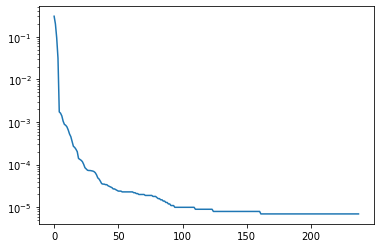

In [79]:
plt.plot(job["output/log/loss"])
plt.yscale('log')

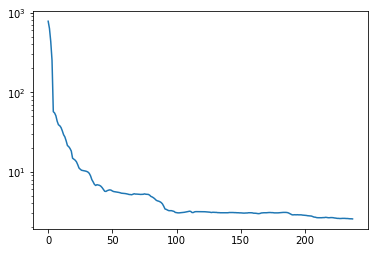

In [80]:
plt.plot(job["output/log/rmse_energy"])
plt.yscale('log')

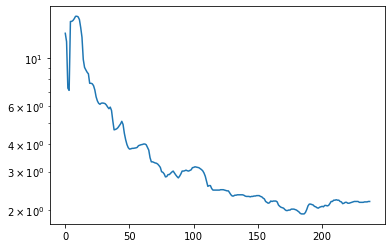

In [81]:
plt.plot(job["output/log/rmse_forces"])
plt.yscale('log')

In [82]:
job.get_final_potential_filename()

'/home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.yaml'

In [83]:
job.get_final_potential_filename_ace()

'/home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace'

# Test fitted potential

In [84]:
test_pr = Project("test_ace_potential")

In [85]:
cu_ace_potential = job.get_lammps_potential()

## Optimization

In [86]:
lammps_job = test_pr.create.job.Lammps("opt_lammps", delete_existing_job=True)

In [87]:
lammps_job.executable.version="2020.12.24_pace"

In [88]:
lammps_job.potential = cu_ace_potential

In [89]:
lammps_job.structure = test_pr.create.structure.ase_bulk("Cu","fcc",cubic=True)

In [90]:
lammps_job.calc_minimize(pressure=0.0)

In [91]:
lammps_job.run()

The job opt_lammps was saved and received the ID: 81


## Elastic matrix

In [111]:
elmat_job = test_pr.create.job.ElasticMatrixJob("elmat")

In [112]:
ref_job = test_pr.create.job.Lammps("ref_job", delete_existing_job=True)

In [113]:
ref_job.executable.version="2020.12.24_pace"

In [114]:
#ref_job.calc_static()

In [115]:
ref_job.potential = cu_ace_potential

In [116]:
ref_job.structure = lammps_job.get_structure()

In [117]:
ref_job.server.run_mode="non_modal"

In [118]:
elmat_job.ref_job = ref_job

In [124]:
elmat_job.run(run_mode="non_modal", run_again=True)

<ipython-input-124-508560412f8a>:1: DeprecationWarning: pyiron_base.job.generic.run(run_again=True) is deprecated. It is not guaranteed to be in service in vers. 0.4.0
  elmat_job.run(run_mode="non_modal", run_again=True)


The job elmat was saved and received the ID: 84


2021-02-26 12:57:06,512 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:57:06,512 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:57:07,141 - pyiron_log - INFO - elmat: run job s_e_0
2021-02-26 12:57:07,141 - pyiron_log - INFO - elmat: run job s_e_0
2021-02-26 12:57:07,578 - pyiron_log - INFO - elmat: finished job s_e_0
2021-02-26 12:57:07,578 - pyiron_log - INFO - elmat: finished job s_e_0
2021-02-26 12:57:07,997 - pyiron_log - INFO - elmat: run job s_01_e_m0_00500
2021-02-26 12:57:07,997 - pyiron_log - INFO - elmat: run job s_01_e_m0_00500
2021-02-26 12:57:08,123 - pyiron_log - INFO - run job: s_e_0 id: None, status: initialized
2021-02-26 12:57:08,123 - pyiron_log - INFO - run job: s_e_0 id: None, status: initialized


The job s_e_0 was saved and received the ID: 85


2021-02-26 12:57:08,511 - pyiron_log - INFO - run job: s_e_0 id: 85, status: created
2021-02-26 12:57:08,511 - pyiron_log - INFO - run job: s_e_0 id: 85, status: created
2021-02-26 12:57:08,972 - pyiron_log - INFO - job: s_e_0 id: 85, status: submitted, run job (modal)
2021-02-26 12:57:08,972 - pyiron_log - INFO - job: s_e_0 id: 85, status: submitted, run job (modal)
2021-02-26 12:57:08,972 - pyiron_log - INFO - job: s_e_0 id: 85, status: submitted, run job (modal)
2021-02-26 12:57:09,380 - pyiron_log - INFO - job: s_e_0 id: 85, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6316532 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS

2021-02-26 12:57:09,392 - pyiron_log - INFO - run job: s_e_0 id: 85, status: collect
2021-02-26 12:57:09,392 - pyiron_log - INFO - run job: s_e_0 id: 85, status: collect
2021-02-26 12:57:09,392 - pyiron_log - INFO - run job: s_e_0 id: 85, status: collect
2021-02-26 12:57:09,886 - pyiron_log - INFO - update master: 84 85 non_modal
2021-02-26 12:57:09,886 - pyiron_log - INFO - update master: 84 85 non_modal
2021-02-26 12:57:09,886 - pyiron_log - INFO - update master: 84 85 non_modal
2021-02-26 12:57:09,989 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:09,989 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:09,989 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:10,626 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:10,626 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:10,626 - pyiron_log - INFO - job: elmat id:

The job s_01_e_m0_00500 was saved and received the ID: 86


2021-02-26 12:57:13,248 - pyiron_log - INFO - run job: s_01_e_m0_00500 id: 86, status: created
2021-02-26 12:57:13,248 - pyiron_log - INFO - run job: s_01_e_m0_00500 id: 86, status: created
2021-02-26 12:57:13,248 - pyiron_log - INFO - run job: s_01_e_m0_00500 id: 86, status: created
2021-02-26 12:57:13,952 - pyiron_log - INFO - job: s_01_e_m0_00500 id: 86, status: submitted, run job (modal)
2021-02-26 12:57:13,952 - pyiron_log - INFO - job: s_01_e_m0_00500 id: 86, status: submitted, run job (modal)
2021-02-26 12:57:13,952 - pyiron_log - INFO - job: s_01_e_m0_00500 id: 86, status: submitted, run job (modal)
2021-02-26 12:57:13,952 - pyiron_log - INFO - job: s_01_e_m0_00500 id: 86, status: submitted, run job (modal)
2021-02-26 12:57:14,313 - pyiron_log - INFO - job: s_01_e_m0_00500 id: 86, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6134493 3.6134493 3.6134493)
  1 by 1 by 1 MPI processor grid
  reading ato

2021-02-26 12:57:14,313 - pyiron_log - INFO - job: s_01_e_m0_00500 id: 86, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6134493 3.6134493 3.6134493)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg 

The job s_01_e_m0_00250 was saved and received the ID: 87


2021-02-26 12:57:18,193 - pyiron_log - INFO - run job: s_01_e_m0_00250 id: 87, status: created
2021-02-26 12:57:18,193 - pyiron_log - INFO - run job: s_01_e_m0_00250 id: 87, status: created
2021-02-26 12:57:18,193 - pyiron_log - INFO - run job: s_01_e_m0_00250 id: 87, status: created
2021-02-26 12:57:18,193 - pyiron_log - INFO - run job: s_01_e_m0_00250 id: 87, status: created
2021-02-26 12:57:18,648 - pyiron_log - INFO - job: s_01_e_m0_00250 id: 87, status: submitted, run job (modal)
2021-02-26 12:57:18,648 - pyiron_log - INFO - job: s_01_e_m0_00250 id: 87, status: submitted, run job (modal)
2021-02-26 12:57:18,648 - pyiron_log - INFO - job: s_01_e_m0_00250 id: 87, status: submitted, run job (modal)
2021-02-26 12:57:18,648 - pyiron_log - INFO - job: s_01_e_m0_00250 id: 87, status: submitted, run job (modal)
2021-02-26 12:57:18,648 - pyiron_log - INFO - job: s_01_e_m0_00250 id: 87, status: submitted, run job (modal)
2021-02-26 12:57:19,003 - pyiron_log - INFO - job: s_01_e_m0_00250 id:

2021-02-26 12:57:19,003 - pyiron_log - INFO - job: s_01_e_m0_00250 id: 87, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6225627 3.6225627 3.6225627)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg 

2021-02-26 12:57:20,168 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:20,179 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:57:20,179 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:57:20,179 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:57:20,179 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:57:20,179 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:57:21,679 - pyiron_log - INFO - elmat: run job s_01_e_0_00250
2021-02-26 12:57:21,679 - pyiron_log - INFO - elmat: run job s_01_e_0_00250
2021-02-26 12:57:21,679 - pyiron_log - INFO - elmat: run job s_01_e_0_00250
2021-02-26 12:57:21,679 - pyiron_log - INFO - elmat: run job s_01_e_0_00250
2021-02-26 12:57:21,679 - pyiron_log - INFO - elmat: run job s_01_e_0_00250
2021-02-26 12:57:21,790 - pyiron_log -

The job s_01_e_0_00250 was saved and received the ID: 88


2021-02-26 12:57:22,714 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: created
2021-02-26 12:57:22,714 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: created
2021-02-26 12:57:22,714 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: created
2021-02-26 12:57:22,714 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: created
2021-02-26 12:57:22,714 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: created
2021-02-26 12:57:23,206 - pyiron_log - INFO - job: s_01_e_0_00250 id: 88, status: submitted, run job (modal)
2021-02-26 12:57:23,206 - pyiron_log - INFO - job: s_01_e_0_00250 id: 88, status: submitted, run job (modal)
2021-02-26 12:57:23,206 - pyiron_log - INFO - job: s_01_e_0_00250 id: 88, status: submitted, run job (modal)
2021-02-26 12:57:23,206 - pyiron_log - INFO - job: s_01_e_0_00250 id: 88, status: submitted, run job (modal)
2021-02-26 12:57:23,206 - pyiron_log - INFO - job: s_01_e_0_00250 id: 88, status: submitted, r

2021-02-26 12:57:23,514 - pyiron_log - INFO - job: s_01_e_0_00250 id: 88, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6407211 3.6407211 3.6407211)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg s

2021-02-26 12:57:23,537 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: collect
2021-02-26 12:57:23,537 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: collect
2021-02-26 12:57:23,537 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: collect
2021-02-26 12:57:23,537 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: collect
2021-02-26 12:57:23,537 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: collect
2021-02-26 12:57:23,537 - pyiron_log - INFO - run job: s_01_e_0_00250 id: 88, status: collect
2021-02-26 12:57:24,109 - pyiron_log - INFO - update master: 84 88 non_modal
2021-02-26 12:57:24,109 - pyiron_log - INFO - update master: 84 88 non_modal
2021-02-26 12:57:24,109 - pyiron_log - INFO - update master: 84 88 non_modal
2021-02-26 12:57:24,109 - pyiron_log - INFO - update master: 84 88 non_modal
2021-02-26 12:57:24,109 - pyiron_log - INFO - update master: 84 88 non_modal
2021-02-26 12:57:24,109 - pyiron_log - INFO - updat

The job s_01_e_0_00500 was saved and received the ID: 89


2021-02-26 12:57:28,326 - pyiron_log - INFO - run job: s_01_e_0_00500 id: 89, status: created
2021-02-26 12:57:28,326 - pyiron_log - INFO - run job: s_01_e_0_00500 id: 89, status: created
2021-02-26 12:57:28,326 - pyiron_log - INFO - run job: s_01_e_0_00500 id: 89, status: created
2021-02-26 12:57:28,326 - pyiron_log - INFO - run job: s_01_e_0_00500 id: 89, status: created
2021-02-26 12:57:28,326 - pyiron_log - INFO - run job: s_01_e_0_00500 id: 89, status: created
2021-02-26 12:57:28,326 - pyiron_log - INFO - run job: s_01_e_0_00500 id: 89, status: created
2021-02-26 12:57:28,866 - pyiron_log - INFO - job: s_01_e_0_00500 id: 89, status: submitted, run job (modal)
2021-02-26 12:57:28,866 - pyiron_log - INFO - job: s_01_e_0_00500 id: 89, status: submitted, run job (modal)
2021-02-26 12:57:28,866 - pyiron_log - INFO - job: s_01_e_0_00500 id: 89, status: submitted, run job (modal)
2021-02-26 12:57:28,866 - pyiron_log - INFO - job: s_01_e_0_00500 id: 89, status: submitted, run job (modal)


2021-02-26 12:57:29,280 - pyiron_log - INFO - job: s_01_e_0_00500 id: 89, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6497663 3.6497663 3.6497663)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg s

2021-02-26 12:57:29,280 - pyiron_log - INFO - job: s_01_e_0_00500 id: 89, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6497663 3.6497663 3.6497663)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg s

2021-02-26 12:57:34,658 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: None, status: initialized
2021-02-26 12:57:34,658 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: None, status: initialized
2021-02-26 12:57:34,658 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: None, status: initialized
2021-02-26 12:57:34,658 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: None, status: initialized
2021-02-26 12:57:34,658 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: None, status: initialized
2021-02-26 12:57:34,658 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: None, status: initialized


The job s_08_e_m0_00500 was saved and received the ID: 90


2021-02-26 12:57:35,000 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: 90, status: created
2021-02-26 12:57:35,000 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: 90, status: created
2021-02-26 12:57:35,000 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: 90, status: created
2021-02-26 12:57:35,000 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: 90, status: created
2021-02-26 12:57:35,000 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: 90, status: created
2021-02-26 12:57:35,000 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: 90, status: created
2021-02-26 12:57:35,000 - pyiron_log - INFO - run job: s_08_e_m0_00500 id: 90, status: created
2021-02-26 12:57:35,480 - pyiron_log - INFO - job: s_08_e_m0_00500 id: 90, status: submitted, run job (modal)
2021-02-26 12:57:35,480 - pyiron_log - INFO - job: s_08_e_m0_00500 id: 90, status: submitted, run job (modal)
2021-02-26 12:57:35,480 - pyiron_log - INFO - job: s_08_e_m0_00500 id: 90, status: submitted, run job (modal)
2021-

2021-02-26 12:57:35,784 - pyiron_log - INFO - job: s_08_e_m0_00500 id: 90, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6134493 3.6134493 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.000 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg 

2021-02-26 12:57:35,784 - pyiron_log - INFO - job: s_08_e_m0_00500 id: 90, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6134493 3.6134493 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.000 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg 

2021-02-26 12:57:36,635 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:36,635 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:36,635 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:36,635 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:37,339 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:37,339 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:37,339 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:37,339 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:37,339 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:37,339 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel mas

The job s_08_e_m0_00250 was saved and received the ID: 91


2021-02-26 12:57:41,108 - pyiron_log - INFO - run job: s_08_e_m0_00250 id: 91, status: created
2021-02-26 12:57:41,108 - pyiron_log - INFO - run job: s_08_e_m0_00250 id: 91, status: created
2021-02-26 12:57:41,108 - pyiron_log - INFO - run job: s_08_e_m0_00250 id: 91, status: created
2021-02-26 12:57:41,108 - pyiron_log - INFO - run job: s_08_e_m0_00250 id: 91, status: created
2021-02-26 12:57:41,108 - pyiron_log - INFO - run job: s_08_e_m0_00250 id: 91, status: created
2021-02-26 12:57:41,108 - pyiron_log - INFO - run job: s_08_e_m0_00250 id: 91, status: created
2021-02-26 12:57:41,108 - pyiron_log - INFO - run job: s_08_e_m0_00250 id: 91, status: created
2021-02-26 12:57:41,108 - pyiron_log - INFO - run job: s_08_e_m0_00250 id: 91, status: created
2021-02-26 12:57:41,754 - pyiron_log - INFO - job: s_08_e_m0_00250 id: 91, status: submitted, run job (modal)
2021-02-26 12:57:41,754 - pyiron_log - INFO - job: s_08_e_m0_00250 id: 91, status: submitted, run job (modal)
2021-02-26 12:57:41,

2021-02-26 12:57:42,118 - pyiron_log - INFO - job: s_08_e_m0_00250 id: 91, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6225627 3.6225627 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg 

2021-02-26 12:57:42,118 - pyiron_log - INFO - job: s_08_e_m0_00250 id: 91, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6225627 3.6225627 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg 

2021-02-26 12:57:42,118 - pyiron_log - INFO - job: s_08_e_m0_00250 id: 91, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6225627 3.6225627 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg 

2021-02-26 12:57:46,624 - pyiron_log - INFO - elmat: finished job s_08_e_0_00250
2021-02-26 12:57:46,624 - pyiron_log - INFO - elmat: finished job s_08_e_0_00250
2021-02-26 12:57:46,624 - pyiron_log - INFO - elmat: finished job s_08_e_0_00250
2021-02-26 12:57:46,624 - pyiron_log - INFO - elmat: finished job s_08_e_0_00250
2021-02-26 12:57:46,624 - pyiron_log - INFO - elmat: finished job s_08_e_0_00250
2021-02-26 12:57:46,624 - pyiron_log - INFO - elmat: finished job s_08_e_0_00250
2021-02-26 12:57:46,624 - pyiron_log - INFO - elmat: finished job s_08_e_0_00250
2021-02-26 12:57:47,047 - pyiron_log - INFO - elmat: run job s_08_e_0_00500
2021-02-26 12:57:47,047 - pyiron_log - INFO - elmat: run job s_08_e_0_00500
2021-02-26 12:57:47,047 - pyiron_log - INFO - elmat: run job s_08_e_0_00500
2021-02-26 12:57:47,047 - pyiron_log - INFO - elmat: run job s_08_e_0_00500
2021-02-26 12:57:47,047 - pyiron_log - INFO - elmat: run job s_08_e_0_00500
2021-02-26 12:57:47,047 - pyiron_log - INFO - elmat: 

The job s_08_e_0_00250 was saved and received the ID: 92


2021-02-26 12:57:47,452 - pyiron_log - INFO - run job: s_08_e_0_00250 id: 92, status: created
2021-02-26 12:57:47,452 - pyiron_log - INFO - run job: s_08_e_0_00250 id: 92, status: created
2021-02-26 12:57:47,452 - pyiron_log - INFO - run job: s_08_e_0_00250 id: 92, status: created
2021-02-26 12:57:47,452 - pyiron_log - INFO - run job: s_08_e_0_00250 id: 92, status: created
2021-02-26 12:57:47,452 - pyiron_log - INFO - run job: s_08_e_0_00250 id: 92, status: created
2021-02-26 12:57:47,452 - pyiron_log - INFO - run job: s_08_e_0_00250 id: 92, status: created
2021-02-26 12:57:47,452 - pyiron_log - INFO - run job: s_08_e_0_00250 id: 92, status: created
2021-02-26 12:57:47,452 - pyiron_log - INFO - run job: s_08_e_0_00250 id: 92, status: created
2021-02-26 12:57:47,452 - pyiron_log - INFO - run job: s_08_e_0_00250 id: 92, status: created
2021-02-26 12:57:47,956 - pyiron_log - INFO - job: s_08_e_0_00250 id: 92, status: submitted, run job (modal)
2021-02-26 12:57:47,956 - pyiron_log - INFO -

2021-02-26 12:57:48,273 - pyiron_log - INFO - job: s_08_e_0_00250 id: 92, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6407211 3.6407211 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg s

2021-02-26 12:57:48,273 - pyiron_log - INFO - job: s_08_e_0_00250 id: 92, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6407211 3.6407211 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg s

2021-02-26 12:57:48,273 - pyiron_log - INFO - job: s_08_e_0_00250 id: 92, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6407211 3.6407211 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg s

2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:48,946 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:57:49,634 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:49,634 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: False parallel master refresh
2021-02-26 12:57:49,634 - pyiron_log - INFO - job: elmat

The job s_08_e_0_00500 was saved and received the ID: 93


2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:54,645 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: created
2021-02-26 12:57:55,120 - pyiron_log - INFO - job: s_08_e_0_

2021-02-26 12:57:55,496 - pyiron_log - INFO - job: s_08_e_0_00500 id: 93, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6497663 3.6497663 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg s

2021-02-26 12:57:55,496 - pyiron_log - INFO - job: s_08_e_0_00500 id: 93, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6497663 3.6497663 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg s

2021-02-26 12:57:55,496 - pyiron_log - INFO - job: s_08_e_0_00500 id: 93, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (3.6497663 3.6497663 3.6316532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up cg s

2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_e_0_00500 id: 93, status: collect
2021-02-26 12:57:55,534 - pyiron_log - INFO - run job: s_08_

2021-02-26 12:58:01,236 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: None, status: initialized
2021-02-26 12:58:01,236 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: None, status: initialized
2021-02-26 12:58:01,236 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: None, status: initialized
2021-02-26 12:58:01,236 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: None, status: initialized
2021-02-26 12:58:01,236 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: None, status: initialized


The job s_23_e_m0_00500 was saved and received the ID: 94


2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run job: s_23_e_m0_00500 id: 94, status: created
2021-02-26 12:58:01,554 - pyiron_log - INFO - run 

2021-02-26 12:58:02,407 - pyiron_log - INFO - job: s_23_e_m0_00500 id: 94, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6314717 3.6312864) with tilt (-0.036316532 -0.036316532 -0.036681532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stenc

2021-02-26 12:58:02,407 - pyiron_log - INFO - job: s_23_e_m0_00500 id: 94, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6314717 3.6312864) with tilt (-0.036316532 -0.036316532 -0.036681532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stenc

2021-02-26 12:58:02,407 - pyiron_log - INFO - job: s_23_e_m0_00500 id: 94, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6314717 3.6312864) with tilt (-0.036316532 -0.036316532 -0.036681532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stenc

2021-02-26 12:58:02,407 - pyiron_log - INFO - job: s_23_e_m0_00500 id: 94, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6314717 3.6312864) with tilt (-0.036316532 -0.036316532 -0.036681532)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stenc

2021-02-26 12:58:03,843 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:58:03,843 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:58:03,843 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:58:03,843 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:58:03,843 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:58:03,843 - pyiron_log - INFO - job: elmat id: 84 run parallel master (modal)
2021-02-26 12:58:08,372 - pyiron_log - INFO - elmat: run job s_23_e_m0_00250
2021-02-26 12:58:08,372 - pyiron_log - INFO - elmat: run job s_23_e_m0_00250
2021-02-26 12:58:08,372 - pyiron_log - INFO - elmat: run job s_23_e_m0_00250
2021-02-26 12:58:08,372 - pyiron_log - INFO - elmat: run job s_23_e_m0_00250
2021-02-26 12:58:08,372 - pyiron_log - INFO - elmat: run job s_23_e_m0_00250
2021-02-26 12:58:08,372 - pyiron_log - INFO - elmat: run job s_

The job s_23_e_m0_00250 was saved and received the ID: 95


2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run job: s_23_e_m0_00250 id: 95, status: created
2021-02-26 12:58:09,541 - pyiron_log - INFO - run 

2021-02-26 12:58:10,341 - pyiron_log - INFO - job: s_23_e_m0_00250 id: 95, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6316078 3.6315620) with tilt (-0.018158266 -0.018158266 -0.018249286)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stenc

2021-02-26 12:58:10,341 - pyiron_log - INFO - job: s_23_e_m0_00250 id: 95, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6316078 3.6315620) with tilt (-0.018158266 -0.018158266 -0.018249286)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stenc

2021-02-26 12:58:10,341 - pyiron_log - INFO - job: s_23_e_m0_00250 id: 95, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6316078 3.6315620) with tilt (-0.018158266 -0.018158266 -0.018249286)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stenc

2021-02-26 12:58:10,341 - pyiron_log - INFO - job: s_23_e_m0_00250 id: 95, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6316078 3.6315620) with tilt (-0.018158266 -0.018158266 -0.018249286)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stenc

2021-02-26 12:58:10,866 - pyiron_log - INFO - update master: 84 95 non_modal
2021-02-26 12:58:10,866 - pyiron_log - INFO - update master: 84 95 non_modal
2021-02-26 12:58:10,866 - pyiron_log - INFO - update master: 84 95 non_modal
2021-02-26 12:58:10,866 - pyiron_log - INFO - update master: 84 95 non_modal
2021-02-26 12:58:10,866 - pyiron_log - INFO - update master: 84 95 non_modal
2021-02-26 12:58:10,866 - pyiron_log - INFO - update master: 84 95 non_modal
2021-02-26 12:58:10,866 - pyiron_log - INFO - update master: 84 95 non_modal
2021-02-26 12:58:10,866 - pyiron_log - INFO - update master: 84 95 non_modal
2021-02-26 12:58:10,866 - pyiron_log - INFO - update master: 84 95 non_modal
2021-02-26 12:58:10,980 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:58:10,980 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:58:10,980 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:58:10,980 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:58:10,980 - p

2021-02-26 12:58:17,404 - pyiron_log - INFO - run job: s_23_e_0_00250 id: None, status: initialized
2021-02-26 12:58:17,404 - pyiron_log - INFO - run job: s_23_e_0_00250 id: None, status: initialized
2021-02-26 12:58:17,404 - pyiron_log - INFO - run job: s_23_e_0_00250 id: None, status: initialized
2021-02-26 12:58:17,404 - pyiron_log - INFO - run job: s_23_e_0_00250 id: None, status: initialized
2021-02-26 12:58:17,404 - pyiron_log - INFO - run job: s_23_e_0_00250 id: None, status: initialized


The job s_23_e_0_00250 was saved and received the ID: 96


2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: created
2021-02-26 12:58:17,708 - pyiron_log - INFO - run job: s_23_

2021-02-26 12:58:18,519 - pyiron_log - INFO - job: s_23_e_0_00250 id: 96, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6316078 3.6315629) with tilt (0.018158266 0.018158266 0.018067701)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: 

2021-02-26 12:58:18,519 - pyiron_log - INFO - job: s_23_e_0_00250 id: 96, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6316078 3.6315629) with tilt (0.018158266 0.018158266 0.018067701)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: 

2021-02-26 12:58:18,519 - pyiron_log - INFO - job: s_23_e_0_00250 id: 96, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6316078 3.6315629) with tilt (0.018158266 0.018158266 0.018067701)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: 

2021-02-26 12:58:18,519 - pyiron_log - INFO - job: s_23_e_0_00250 id: 96, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6316078 3.6315629) with tilt (0.018158266 0.018158266 0.018067701)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: 

2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_e_0_00250 id: 96, status: collect
2021-02-26 12:58:18,560 - pyiron_log - INFO - run job: s_23_

2021-02-26 12:58:25,148 - pyiron_log - INFO - elmat: finished job s_23_e_0_00500
2021-02-26 12:58:25,148 - pyiron_log - INFO - elmat: finished job s_23_e_0_00500
2021-02-26 12:58:25,148 - pyiron_log - INFO - elmat: finished job s_23_e_0_00500
2021-02-26 12:58:25,148 - pyiron_log - INFO - elmat: finished job s_23_e_0_00500
2021-02-26 12:58:25,282 - pyiron_log - INFO - run job: s_23_e_0_00500 id: None, status: initialized
2021-02-26 12:58:25,282 - pyiron_log - INFO - run job: s_23_e_0_00500 id: None, status: initialized
2021-02-26 12:58:25,282 - pyiron_log - INFO - run job: s_23_e_0_00500 id: None, status: initialized
2021-02-26 12:58:25,282 - pyiron_log - INFO - run job: s_23_e_0_00500 id: None, status: initialized
2021-02-26 12:58:25,282 - pyiron_log - INFO - run job: s_23_e_0_00500 id: None, status: initialized
2021-02-26 12:58:25,282 - pyiron_log - INFO - run job: s_23_e_0_00500 id: None, status: initialized
2021-02-26 12:58:25,282 - pyiron_log - INFO - run job: s_23_e_0_00500 id: No

The job s_23_e_0_00500 was saved and received the ID: 97


2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_e_0_00500 id: 97, status: created
2021-02-26 12:58:25,642 - pyiron_log - INFO - run job: s_23_

2021-02-26 12:58:26,553 - pyiron_log - INFO - job: s_23_e_0_00500 id: 97, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6314717 3.6312937) with tilt (0.036316532 0.036316532 0.035955165)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: 

2021-02-26 12:58:26,553 - pyiron_log - INFO - job: s_23_e_0_00500 id: 97, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6314717 3.6312937) with tilt (0.036316532 0.036316532 0.035955165)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: 

2021-02-26 12:58:26,553 - pyiron_log - INFO - job: s_23_e_0_00500 id: 97, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6314717 3.6312937) with tilt (0.036316532 0.036316532 0.035955165)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: 

2021-02-26 12:58:26,553 - pyiron_log - INFO - job: s_23_e_0_00500 id: 97, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6314717 3.6312937) with tilt (0.036316532 0.036316532 0.035955165)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: 

2021-02-26 12:58:26,553 - pyiron_log - INFO - job: s_23_e_0_00500 id: 97, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  triclinic box = (0.0000000 0.0000000 0.0000000) to (3.6316532 3.6314717 3.6312937) with tilt (0.036316532 0.036316532 0.035955165)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  4 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=1) 11 (r>1)
Mapping LAMMPS atom type #1(Cu) -> ACE species type #0
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 2 2 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair pace, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: 

2021-02-26 12:58:28,349 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: True parallel master refresh
2021-02-26 12:58:28,349 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: True parallel master refresh
2021-02-26 12:58:28,349 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: True parallel master refresh
2021-02-26 12:58:28,349 - pyiron_log - INFO - job: elmat id: 84, status: refresh, finished: True parallel master refresh
2021-02-26 12:58:28,482 - pyiron_log - INFO - run job: elmat id: 84, status: collect
2021-02-26 12:58:28,482 - pyiron_log - INFO - run job: elmat id: 84, status: collect
2021-02-26 12:58:28,482 - pyiron_log - INFO - run job: elmat id: 84, status: collect
2021-02-26 12:58:28,482 - pyiron_log - INFO - run job: elmat id: 84, status: collect
2021-02-26 12:58:28,482 - pyiron_log - INFO - run job: elmat id: 84, status: collect
2021-02-26 12:58:28,482 - pyiron_log - INFO - run job: elmat id: 84, status: collect
2021-0

In [139]:
test_pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,81,finished,Cu4,opt_lammps,/opt_lammps,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/,2021-02-26 12:54:46.117385,2021-02-26 12:54:46.617448,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,NaN
1,82,finished,Cu4,phon_job,/phon_job,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/,2021-02-26 12:54:58.745687,2021-02-26 12:55:13.747981,15.0,pyiron@dell-inspiron#1#1/1,PhonopyJob,0.0.1,None,NaN
2,83,finished,Cu108,ref_job_0,/ref_job_0,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/phon_job_hdf5/,2021-02-26 12:55:11.351661,2021-02-26 12:55:11.862122,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,82.0
3,84,finished,Cu4,elmat,/elmat,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/,2021-02-26 12:57:05.499830,2021-02-26 12:58:28.890465,83.0,pyiron@dell-inspiron#1#1/13,ElasticMatrixJob,0.0.1,None,NaN
4,85,finished,Cu4,s_e_0,/s_e_0,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:57:09.134167,2021-02-26 12:57:09.656789,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,84.0
5,86,finished,Cu4,s_01_e_m0_00500,/s_01_e_m0_00500,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:57:14.089914,2021-02-26 12:57:14.722149,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,84.0
6,87,finished,Cu4,s_01_e_m0_00250,/s_01_e_m0_00250,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:57:18.778998,2021-02-26 12:57:19.251781,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,84.0
7,88,finished,Cu4,s_01_e_0_00250,/s_01_e_0_00250,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:57:23.312311,2021-02-26 12:57:23.914459,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,84.0
8,89,finished,Cu4,s_01_e_0_00500,/s_01_e_0_00500,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:57:29.045891,2021-02-26 12:57:29.597258,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,84.0
9,90,finished,Cu4,s_08_e_m0_00500,/s_08_e_m0_00500,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:57:35.593480,2021-02-26 12:57:36.263261,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,84.0


In [140]:
elmat_job["output/elasticmatrix"]["C"]

array([[185.94676377, 120.73237664, 120.73237664,   0.        ,
          0.        ,   0.        ],
       [120.73237664, 185.94676377, 120.73237664,   0.        ,
          0.        ,   0.        ],
       [120.73237664, 120.73237664, 185.94676377,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  78.34168019,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         78.34168019,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  78.34168019]])

## Phonons

In [100]:
phon_job = test_pr.create.job.PhonopyJob("phon_job", delete_existing_job=True)

In [101]:
ref_job = test_pr.create.job.Lammps("ref_job", delete_existing_job=True)

In [102]:
ref_job.executable.version="2020.12.24_pace"

In [103]:
ref_job.calc_static()

In [104]:
ref_job.potential = cu_ace_potential

In [105]:
ref_job.structure = lammps_job.get_structure()

In [106]:
phon_job.ref_job = ref_job

In [107]:
phon_job.run(run_mode="non_modal")

The job phon_job was saved and received the ID: 82


2021-02-26 12:55:09,485 - pyiron_log - INFO - job: phon_job id: 82 run parallel master (modal)
2021-02-26 12:55:09,485 - pyiron_log - INFO - job: phon_job id: 82 run parallel master (modal)
2021-02-26 12:55:10,131 - pyiron_log - INFO - phon_job: run job ref_job_0
2021-02-26 12:55:10,131 - pyiron_log - INFO - phon_job: run job ref_job_0
2021-02-26 12:55:10,251 - pyiron_log - INFO - phon_job: finished job ref_job_0
2021-02-26 12:55:10,251 - pyiron_log - INFO - phon_job: finished job ref_job_0
2021-02-26 12:55:10,353 - pyiron_log - INFO - run job: ref_job_0 id: None, status: initialized
2021-02-26 12:55:10,353 - pyiron_log - INFO - run job: ref_job_0 id: None, status: initialized


The job ref_job_0 was saved and received the ID: 83


2021-02-26 12:55:10,721 - pyiron_log - INFO - run job: ref_job_0 id: 83, status: created
2021-02-26 12:55:10,721 - pyiron_log - INFO - run job: ref_job_0 id: 83, status: created
2021-02-26 12:55:11,237 - pyiron_log - INFO - job: ref_job_0 id: 83, status: submitted, run job (modal)
2021-02-26 12:55:11,237 - pyiron_log - INFO - job: ref_job_0 id: 83, status: submitted, run job (modal)
2021-02-26 12:55:11,237 - pyiron_log - INFO - job: ref_job_0 id: 83, status: submitted, run job (modal)
2021-02-26 12:55:11,576 - pyiron_log - INFO - job: ref_job_0 id: 83, status: collect, output: LAMMPS (24 Dec 2020)
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (10.895946 10.895946 10.895946)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  108 atoms
  read_data CPU = 0.001 seconds
ACE version: 2021.2.3
Recursive evaluator is used
Loading /home/yury/pyiron/projects/pyiron-2021/pacemaker_fit/df1_cut5_hdf5/df1_cut5/df1_cut5.ace
Total number of basis functions
	Cu: 15 (r=

2021-02-26 12:55:11,589 - pyiron_log - INFO - run job: ref_job_0 id: 83, status: collect
2021-02-26 12:55:11,589 - pyiron_log - INFO - run job: ref_job_0 id: 83, status: collect
2021-02-26 12:55:11,589 - pyiron_log - INFO - run job: ref_job_0 id: 83, status: collect
2021-02-26 12:55:12,083 - pyiron_log - INFO - update master: 82 83 non_modal
2021-02-26 12:55:12,083 - pyiron_log - INFO - update master: 82 83 non_modal
2021-02-26 12:55:12,083 - pyiron_log - INFO - update master: 82 83 non_modal
2021-02-26 12:55:12,207 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:55:12,207 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:55:12,207 - pyiron_log - INFO - run_if_refresh() called
2021-02-26 12:55:12,904 - pyiron_log - INFO - job: phon_job id: 82, status: refresh, finished: True parallel master refresh
2021-02-26 12:55:12,904 - pyiron_log - INFO - job: phon_job id: 82, status: refresh, finished: True parallel master refresh
2021-02-26 12:55:12,904 - pyiron_log - INFO 

In [122]:
test_pr.job_table(full_table=True)

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,64,finished,Cu4,elmat,/elmat,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/,2021-02-26 12:50:04.490993,2021-02-26 12:51:24.937689,80.0,pyiron@dell-inspiron#1#1/13,ElasticMatrixJob,0.0.1,None,NaN
1,65,finished,Cu4,s_e_0,/s_e_0,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:50:08.150673,2021-02-26 12:50:08.670702,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,64.0
2,66,finished,Cu4,s_01_e_m0_00500,/s_01_e_m0_00500,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:50:13.073071,2021-02-26 12:50:13.600686,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,64.0
3,67,finished,Cu4,s_01_e_m0_00250,/s_01_e_m0_00250,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:50:17.795531,2021-02-26 12:50:18.350906,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,64.0
4,68,finished,Cu4,s_01_e_0_00250,/s_01_e_0_00250,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:50:22.684634,2021-02-26 12:50:23.240086,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,64.0
5,69,finished,Cu4,s_01_e_0_00500,/s_01_e_0_00500,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:50:27.896122,2021-02-26 12:50:28.480391,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,64.0
6,70,finished,Cu4,s_08_e_m0_00500,/s_08_e_m0_00500,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:50:33.162833,2021-02-26 12:50:33.698030,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,64.0
7,71,finished,Cu4,s_08_e_m0_00250,/s_08_e_m0_00250,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:50:39.052056,2021-02-26 12:50:39.605935,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,64.0
8,72,finished,Cu4,s_08_e_0_00250,/s_08_e_0_00250,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:50:45.441164,2021-02-26 12:50:46.030061,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,64.0
9,73,finished,Cu4,s_08_e_0_00500,/s_08_e_0_00500,/home/yury/pyiron/projects/,pyiron-2021/test_ace_potential/elmat_hdf5/,2021-02-26 12:50:52.363621,2021-02-26 12:50:53.040951,0.0,pyiron@dell-inspiron#1,Lammps,0.1,None,64.0


<AxesSubplot:title={'center':'Phonon DOS vs Energy'}, xlabel='Frequency [THz]', ylabel='DOS'>

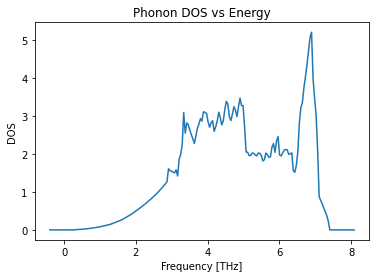

In [110]:
phon_job.plot_dos()